Dataset: Haberman's Survival Data

Link: https://www.kaggle.com/gilsousa/habermans-survival-data-set

Relevant Information: The dataset contains cases from a study that was conducted between 1958 and 1970 at the University of Chicago's Billings Hospital on the survival of patients who had undergone surgery for breast cancer.

Objective: Classify as to which patient survived for more than 5 years and who died within 5 years. 


Attribute Information:

1) Age - Age of patient at time of operation 

2) Year - Patient's year of operation

3) Axl_nodes - Number of positive axillary nodes detected

4) Survival - Survival status (class attribute) 1 = the patient survived 5 years or longer, 2 = the patient died within 5 year

In [31]:
#Importing the necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [32]:
#Reading the data
df = pd.read_csv("haberman.csv", names=["Age","Year","Axl_nodes","Survival"])

In [33]:
df.head()

,Age,Year,Axl_nodes,Survival
0,30,64,1,1
1,30,62,3,1
2,30,65,0,1
3,31,59,2,1
4,31,65,4,1


In [34]:
df.shape

(306, 4)

In [35]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 306 entries, 0 to 305
Data columns (total 4 columns):
Age          306 non-null int64
Year         306 non-null int64
Axl_nodes    306 non-null int64
Survival     306 non-null int64
dtypes: int64(4)
memory usage: 9.6 KB


In [36]:
df.describe()

,Age,Year,Axl_nodes,Survival
count,306.000000,306.000000,306.000000,306.000000
mean,52.457516,62.852941,4.026144,1.264706
std,10.803452,3.249405,7.189654,0.441899
min,30.000000,58.000000,0.000000,1.000000
25%,44.000000,60.000000,0.000000,1.000000
50%,52.000000,63.000000,1.000000,1.000000
75%,60.750000,65.750000,4.000000,2.000000
max,83.000000,69.000000,52.000000,2.000000


**Observation**

1) It can be seen that youngsters and children of the age group 0 to 29 are not present in dataset and may be less likely prone to cancer.

In [37]:
df["Survival"].value_counts()

1    225
2     81
Name: Survival, dtype: int64

**Observation**

1) Seeing the Survival Value_counts(), it can be said that Survival column is imbalanced.

UNI-VARIATE ANALYSIS

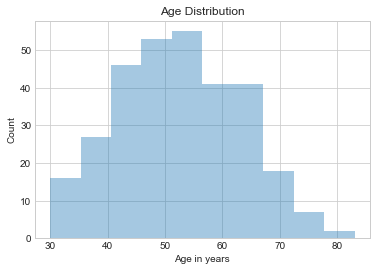

In [38]:
#EDA of Age

sns.set_style("whitegrid")
sns.distplot(a = df["Age"], bins = 10, kde = False)
plt.xlabel("Age in years")
plt.ylabel("Count")
plt.title("Age Distribution")
plt.show()

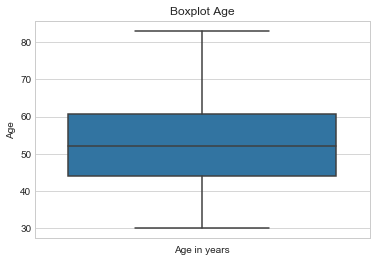

Percentage of people in age group of 0 to 39 are: 13.071895424836603 %
Percentage of people in age group of 40 to 60 are: 61.76470588235294 %
Percentage of people in age group greater than 60 are: 25.163398692810457 %


In [39]:
#Age Boxplot

sns.set_style("whitegrid")
sns.boxplot(x = "Age",data = df, orient = "v")
plt.xlabel("Age in years")
plt.title("Boxplot Age")
plt.show()

age_middle = len(df[(df["Age"]>=40) &(df["Age"]<=60)])/len(df["Age"])
age_young = len(df[(df["Age"]>=0) &(df["Age"]<=39)])/len(df["Age"])
age_old = len(df[df["Age"]>=61])/len(df["Age"])

print("Percentage of people in age group of 0 to 39 are:", age_young*100,"%" )
print("Percentage of people in age group of 40 to 60 are:", age_middle*100,"%" )
print("Percentage of people in age group greater than 60 are:", age_old*100,"%" )

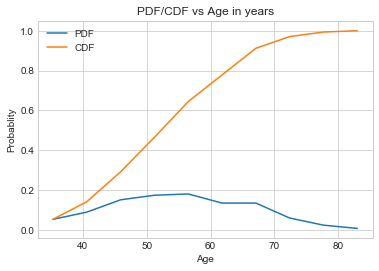

In [40]:
#PDF
#Calculating PDF of Age Feature

count, bin_edges = np.histogram(a = df["Age"], bins =10)
pdf = count/sum(count)

#Calculating CDF
a = 0
cdf = []
for i in count:
    a = a+i
    cdf.append(a)
    
z = cdf/sum(count)

plt.plot(bin_edges[1:],pdf)
plt.plot(bin_edges[1:],z)
plt.xlabel("Age")
plt.ylabel("Probablity")
plt.title("PDF/CDF vs Age in years")
legend = ["PDF","CDF"]
plt.legend(legend)
plt.show()    

**Observation:**

1) The Major chunk of people (around 62%) who are prone to cancer belongs to middle age group( 40 to 60 years).

2) Even in CDF we can see that 80 percentile of people have an age of 62 or less.

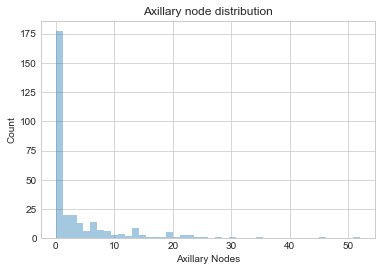

Percentage of Axillary Node between 0 to 2:  64.37908496732027 %


In [41]:
#EDA of Axillary Nodes

sns.distplot(df["Axl_nodes"], kde = False)
plt.xlabel("Axillary Nodes")
plt.ylabel("Count")
plt.title("Axillary node distribution")
plt.show()

count_0 = len(df[df["Axl_nodes"]==0]["Axl_nodes"])
count_1 = len(df[df["Axl_nodes"]==1]["Axl_nodes"])
count_2 = len(df[df["Axl_nodes"]==2]["Axl_nodes"])

tot = len(df)

print("Percentage of Axillary Node between 0 to 2: ",((count_0+count_1+count_2)/tot)*100,"%")

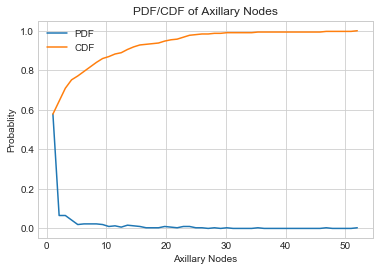

In [42]:
#PDF
#Calculating PDF of Axillary Node

count, bin_edges = np.histogram(a = df["Axl_nodes"], bins =50)
pdf = count/sum(count)

#Calculating CDF
a = 0
cdf = []
for i in count:
    a = a+i
    cdf.append(a)
    
z = cdf/sum(count)

plt.plot(bin_edges[1:],pdf)
plt.plot(bin_edges[1:],z)
plt.xlabel("Axillary Nodes")
plt.ylabel("Probablity")
plt.title("PDF/CDF of Axillary Nodes")
legend = ["PDF","CDF"]
plt.legend(legend)
plt.show()    

**Observation:**

1) More than 60 percent of the Axillary nodes are between 0 and 2.

2) PDF for Axillary nodes is highly left skewed/Negatively skewed, which means most of the Axillary Nodes lie between 0 to 10.

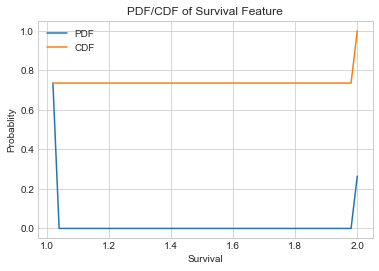

In [43]:
#PDF
#Calculating PDF of Survival

count, bin_edges = np.histogram(a = df["Survival"], bins =50)
pdf = count/sum(count)

#Calculating CDF
a = 0
cdf = []
for i in count:
    a = a+i
    cdf.append(a)
    
z = cdf/sum(count)

plt.plot(bin_edges[1:],pdf)
plt.plot(bin_edges[1:],z)
plt.xlabel("Survival")
plt.ylabel("Probablity")
plt.title("PDF/CDF of Survival Feature")
legend = ["PDF","CDF"]
plt.legend(legend)
plt.show() 

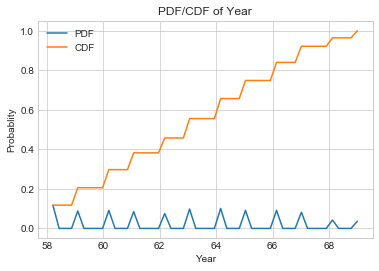

In [44]:
#PDF
#Calculating PDF of Year

count, bin_edges = np.histogram(a = df["Year"], bins =50)
pdf = count/sum(count)

#Calculating CDF
a = 0
cdf = []
for i in count:
    a = a+i
    cdf.append(a)
    
z = cdf/sum(count)

plt.plot(bin_edges[1:],pdf)
plt.plot(bin_edges[1:],z)
plt.xlabel("Year")
plt.ylabel("Probablity")
plt.title("PDF/CDF of Year")
legend = ["PDF","CDF"]
plt.legend(legend)
plt.show() 

**Observation**

1) It can be seen that the number of cancer cases for all years mentioned have been almost constant except for year 1968. 

BI-Variate Analysis

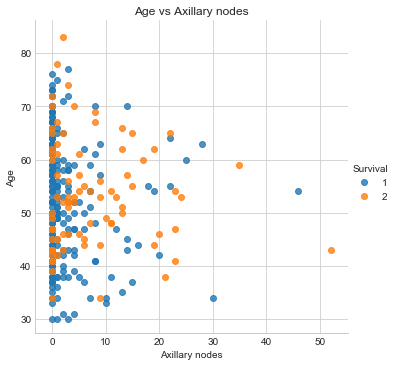

In [45]:
#Age vs Axillary Node

ax = sns.lmplot(x ="Axl_nodes", y ="Age",data = df,fit_reg = False,hue ="Survival")
plt.xlabel("Axillary nodes")
plt.ylabel("Age")
plt.title("Age vs Axillary nodes")

#handles, labels = ax.get_legend_handles_labels()
#plt.legend(handles, ["Survived>5 years","Survived<5 years"])
plt.show()

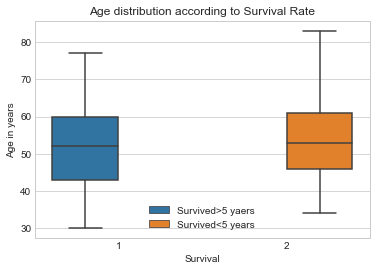

In [46]:
ax = sns.boxplot(data = df, x="Survival", y="Age", hue = "Survival")
plt.xlabel("Survival")
plt.ylabel("Age in years")
plt.title("Age distribution according to Survival Rate")
handles, labels = ax.get_legend_handles_labels()
plt.legend(handles,["Survived>5 yaers","Survived<5 years"])
plt.show()

**Observation:**

1) Age cannot be considered a major factor for Survival in this case because many people of similar ages have survived as well as died due to the disease.

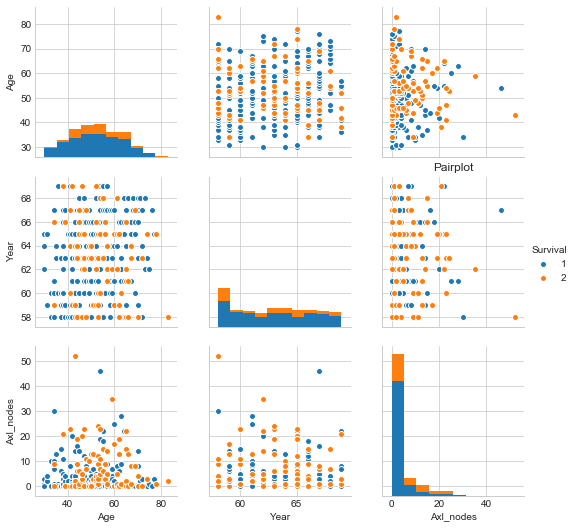

In [47]:
#Pairplot

ax = sns.pairplot(data = df, hue = "Survival", vars = ["Age","Year","Axl_nodes"])
plt.title("Pairplot")
plt.show()

**Observation**

1) Age seems to be normally distributed.

2) For most of the people, the Axillary node seems to be in range of 0 to 10.

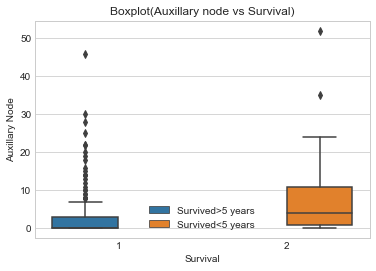

Percentage of People who Survived more than 5 years with Auxillary nodes between 0 and 3: 79.11111111111111 %
Percentage of people who could not survive more than 5 years with an Auxillary node between 3 and 11: 75.30864197530865 %


In [48]:
#Boxplot - Auxillary Node vs Survival

ax = sns.boxplot(data = df, x="Survival", y="Axl_nodes", hue="Survival")
plt.title("Boxplot(Auxillary node vs Survival)")
plt.xlabel("Survival")
plt.ylabel("Auxillary Node")
handles, labels = ax.get_legend_handles_labels()
plt.legend(handles, ["Survived>5 years", "Survived<5 years"])
plt.show()

count_0 = len(df[(df["Survival"]==1) & (df["Axl_nodes"]==0)])
count_1 = len(df[(df["Survival"]==1) & (df["Axl_nodes"]==1)])
count_2 = len(df[(df["Survival"]==1) & (df["Axl_nodes"]==2)])
count_3 = len(df[(df["Survival"]==1) & (df["Axl_nodes"]==3)])
tot = len(df[df["Survival"]==1])

print("Percentage of People who Survived more than 5 years with Auxillary nodes between 0 and 3:", ((count_0+count_1+count_2+count_3)/tot)*100,"%")

count = []
for i in range(0,12):
    count.append(len(df[(df["Survival"]==2) & (df["Axl_nodes"]==i)]))
tot = len(df[df["Survival"]==2])

print("Percentage of people who could not survive more than 5 years with an Auxillary node between 3 and 11:",(sum(count)/tot)*100,"%")

**Observation:**

1) About 79 percent of people who survived for more than 5 years had an Axillary node between 0 and 3.

2) 75 percent of people who could not survive for more than 5 years had Axillary node ranging from 3 to 11.

3) Many outliers can be seen in the survival plot whose axillary node ranges from 7 to 32.

In [49]:
#Correlation Table

df.corr(method = "spearman")

,Age,Year,Axl_nodes,Survival
Age,1.000000,0.091069,-0.097691,0.055914
Year,0.091069,1.000000,-0.036146,-0.007536
Axl_nodes,-0.097691,-0.036146,1.000000,0.327081
Survival,0.055914,-0.007536,0.327081,1.000000


**Observation:**

1) Looking at the correlationship of features with eachother, it can be said that "Axillary nodes" and "Survival" are most related.



In [50]:
df[df["Survival"]==1]["Axl_nodes"].describe()

count    225.000000
mean       2.791111
std        5.870318
min        0.000000
25%        0.000000
50%        0.000000
75%        3.000000
max       46.000000
Name: Axl_nodes, dtype: float64

In [51]:
df[df["Survival"]==2]["Axl_nodes"].describe()

count    81.000000
mean      7.456790
std       9.185654
min       0.000000
25%       1.000000
50%       4.000000
75%      11.000000
max      52.000000
Name: Axl_nodes, dtype: float64

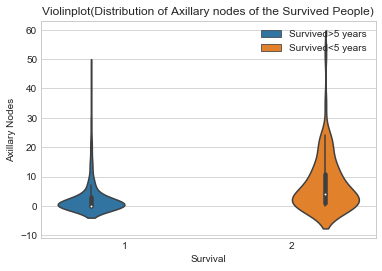

In [52]:
#EDA Violinplot

ax = sns.violinplot(x = "Survival", y= "Axl_nodes", hue= "Survival", data = df)
plt.xlabel("Survival")
plt.ylabel("Axillary Nodes")
plt.title("Violinplot(Distribution of Axillary nodes of the Survived People)")
handles, lables = ax.get_legend_handles_labels()
plt.legend(handles, ["Survived>5 years","Survived<5 years"])
plt.show()

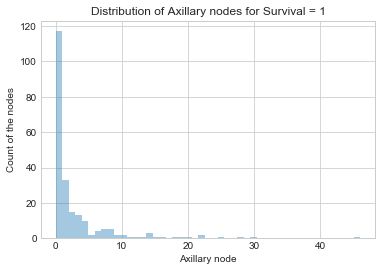

In [53]:
#EDA Count of Axillary node for Survival = 1

sns.distplot(df[df["Survival"]==1]["Axl_nodes"], kde = False)
plt.xlabel("Axillary node")
plt.ylabel("Count of the nodes")
plt.title("Distribution of Axillary nodes for Survival = 1")
plt.show()

**Observation**

1) It can be seen that the graph is highly left skewed and can be seen that there are a lot of outliers.

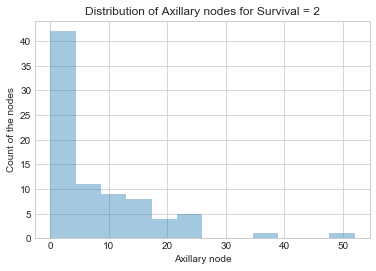

In [54]:
sns.distplot(df[df["Survival"]==2]["Axl_nodes"], kde = False)
plt.xlabel("Axillary node")
plt.ylabel("Count of the nodes")
plt.title("Distribution of Axillary nodes for Survival = 2")
plt.show()

**Observation**

1) It can be seen that the count of Axillary node is less left skewed for people who  survived for < 5 years. It also has less number of outliers. 

In [55]:
df["Axl_nodes"].value_counts().head()

0    136
1     41
2     20
3     20
4     13
Name: Axl_nodes, dtype: int64

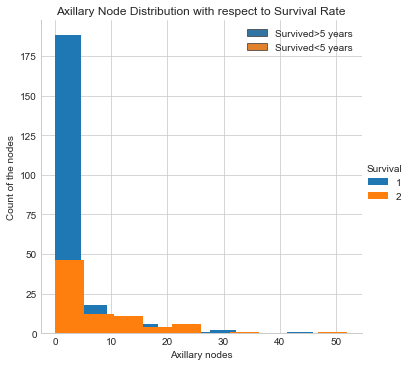

In [56]:
sns.FacetGrid(df, hue="Survival", size=5).map(plt.hist, "Axl_nodes").add_legend();
plt.xlabel("Axillary nodes")
plt.ylabel("Count of the nodes")
plt.title("Axillary Node Distribution with respect to Survival Rate")
handles, lables = ax.get_legend_handles_labels()
plt.legend(handles, ["Survived>5 years","Survived<5 years"])
plt.show();

**Observation:**

1) People having Axillary node between 0-5 and survived for < 5 years are less than 1/3 rd population of people who survived, as seen in the graph. 

****Conclusion: ****

1) Young people and children are less prone to Cancer.

2) The label column (Survival) is highly imbalanced and hence some measures need to be taken to convert it to a balanced column.

3) The major chunk of population are middle aged people(40-60) with 61 % of population. Though Age doesnt play a major part to describe the fact who survived for less than 5 years or greater than 5 years.

4) A high correlation can be seen between Axillary Node and Survival Rate, which also makes  Axillary Node the best available feature for predicting the Survival Rate.

5) Axillary Node feature is also imbalanced with 64% of nodes ranging between 0 and 2.

6) People having Axillary node between 0-5 and survived for < 5 years are less than 1/3 rd population of people who survived.